## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 Regression 예측 model 작성

auto-mpg.data - data file  
auto-mpg.names - data 설명 file

1. mpg:           continuous  
2. cylinders:     multi-valued discrete  
3. displacement:  continuous (배기량)   
4. horsepower:    continuous  
5. weight:        continuous  
6. acceleration:  continuous  
7. model year:    multi-valued discrete  
8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [2]:
data_path = tf.keras.utils.get_file("auto-mpg.data", 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

data.head()

,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
X_train.shape

(294, 13)

### Regression Model Build

### train

### predict

### $r^2$ 계산

In [6]:
model = Sequential()

model.add(Dense(64, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))

In [7]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [8]:
history = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_test, y_test),
                   verbose=1)

Epoch 1/500
3/3 [==============================] - 1s 73ms/step - loss: 608.4030 - mse: 608.4030 - val_loss: 635.9932 - val_mse: 635.9932
Epoch 2/500
3/3 [==============================] - 0s 11ms/step - loss: 597.7338 - mse: 597.7338 - val_loss: 625.2619 - val_mse: 625.2619
Epoch 3/500
3/3 [==============================] - 0s 29ms/step - loss: 587.7156 - mse: 587.7156 - val_loss: 614.4996 - val_mse: 614.4996
Epoch 4/500
3/3 [==============================] - 0s 12ms/step - loss: 577.2411 - mse: 577.2411 - val_loss: 603.5817 - val_mse: 603.5817
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 566.4459 - mse: 566.4459 - val_loss: 592.2197 - val_mse: 592.2197
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 555.8514 - mse: 555.8514 - val_loss: 580.1013 - val_mse: 580.1013
Epoch 7/500
3/3 [==============================] - 0s 12ms/step - loss: 544.4254 - mse: 544.4254 - val_loss: 567.3488 - val_mse: 567.3488
Epoch 8/500
3/3 [=================

Epoch 61/500
3/3 [==============================] - 0s 8ms/step - loss: 14.6847 - mse: 14.6847 - val_loss: 10.5263 - val_mse: 10.5263
Epoch 62/500
3/3 [==============================] - 0s 11ms/step - loss: 14.3482 - mse: 14.3482 - val_loss: 10.3179 - val_mse: 10.3179
Epoch 63/500
3/3 [==============================] - 0s 10ms/step - loss: 14.0669 - mse: 14.0669 - val_loss: 10.1043 - val_mse: 10.1043
Epoch 64/500
3/3 [==============================] - 0s 10ms/step - loss: 13.7816 - mse: 13.7816 - val_loss: 9.8906 - val_mse: 9.8906
Epoch 65/500
3/3 [==============================] - 0s 11ms/step - loss: 13.5124 - mse: 13.5124 - val_loss: 9.6720 - val_mse: 9.6720
Epoch 66/500
3/3 [==============================] - 0s 9ms/step - loss: 13.2536 - mse: 13.2536 - val_loss: 9.4788 - val_mse: 9.4788
Epoch 67/500
3/3 [==============================] - 0s 10ms/step - loss: 13.0137 - mse: 13.0137 - val_loss: 9.3077 - val_mse: 9.3077
Epoch 68/500
3/3 [==============================] - 0s 10ms/step 

3/3 [==============================] - 0s 9ms/step - loss: 8.1477 - mse: 8.1477 - val_loss: 5.8671 - val_mse: 5.8671
Epoch 124/500
3/3 [==============================] - 0s 9ms/step - loss: 8.1054 - mse: 8.1054 - val_loss: 5.8347 - val_mse: 5.8347
Epoch 125/500
3/3 [==============================] - 0s 14ms/step - loss: 8.0679 - mse: 8.0679 - val_loss: 5.8118 - val_mse: 5.8118
Epoch 126/500
3/3 [==============================] - 0s 11ms/step - loss: 8.0379 - mse: 8.0379 - val_loss: 5.7925 - val_mse: 5.7925
Epoch 127/500
3/3 [==============================] - 0s 10ms/step - loss: 8.0036 - mse: 8.0036 - val_loss: 5.7776 - val_mse: 5.7776
Epoch 128/500
3/3 [==============================] - 0s 16ms/step - loss: 7.9795 - mse: 7.9795 - val_loss: 5.7640 - val_mse: 5.7640
Epoch 129/500
3/3 [==============================] - 0s 11ms/step - loss: 7.9446 - mse: 7.9446 - val_loss: 5.7403 - val_mse: 5.7403
Epoch 130/500
3/3 [==============================] - 0s 11ms/step - loss: 7.9173 - mse: 7.91

3/3 [==============================] - 0s 10ms/step - loss: 6.9633 - mse: 6.9633 - val_loss: 5.2746 - val_mse: 5.2746
Epoch 186/500
3/3 [==============================] - 0s 11ms/step - loss: 6.9393 - mse: 6.9393 - val_loss: 5.2577 - val_mse: 5.2577
Epoch 187/500
3/3 [==============================] - 0s 11ms/step - loss: 6.9261 - mse: 6.9261 - val_loss: 5.2419 - val_mse: 5.2419
Epoch 188/500
3/3 [==============================] - 0s 13ms/step - loss: 6.9212 - mse: 6.9212 - val_loss: 5.2330 - val_mse: 5.2330
Epoch 189/500
3/3 [==============================] - 0s 9ms/step - loss: 6.9186 - mse: 6.9186 - val_loss: 5.2246 - val_mse: 5.2246
Epoch 190/500
3/3 [==============================] - 0s 10ms/step - loss: 6.9013 - mse: 6.9013 - val_loss: 5.2114 - val_mse: 5.2114
Epoch 191/500
3/3 [==============================] - 0s 16ms/step - loss: 6.8861 - mse: 6.8861 - val_loss: 5.1916 - val_mse: 5.1916
Epoch 192/500
3/3 [==============================] - 0s 12ms/step - loss: 6.8769 - mse: 6.8

3/3 [==============================] - 0s 16ms/step - loss: 6.3576 - mse: 6.3576 - val_loss: 5.0483 - val_mse: 5.0483
Epoch 248/500
3/3 [==============================] - 0s 11ms/step - loss: 6.3457 - mse: 6.3457 - val_loss: 5.0391 - val_mse: 5.0391
Epoch 249/500
3/3 [==============================] - 0s 10ms/step - loss: 6.3422 - mse: 6.3422 - val_loss: 5.0165 - val_mse: 5.0165
Epoch 250/500
3/3 [==============================] - 0s 10ms/step - loss: 6.3486 - mse: 6.3486 - val_loss: 5.0000 - val_mse: 5.0000
Epoch 251/500
3/3 [==============================] - 0s 14ms/step - loss: 6.3256 - mse: 6.3256 - val_loss: 4.9865 - val_mse: 4.9865
Epoch 252/500
3/3 [==============================] - 0s 9ms/step - loss: 6.3302 - mse: 6.3302 - val_loss: 4.9783 - val_mse: 4.9783
Epoch 253/500
3/3 [==============================] - 0s 10ms/step - loss: 6.3189 - mse: 6.3189 - val_loss: 4.9717 - val_mse: 4.9717
Epoch 254/500
3/3 [==============================] - 0s 10ms/step - loss: 6.3093 - mse: 6.3

3/3 [==============================] - 0s 9ms/step - loss: 6.0074 - mse: 6.0074 - val_loss: 4.8789 - val_mse: 4.8789
Epoch 310/500
3/3 [==============================] - 0s 9ms/step - loss: 5.9920 - mse: 5.9920 - val_loss: 4.8872 - val_mse: 4.8872
Epoch 311/500
3/3 [==============================] - 0s 10ms/step - loss: 5.9961 - mse: 5.9961 - val_loss: 4.8921 - val_mse: 4.8921
Epoch 312/500
3/3 [==============================] - 0s 12ms/step - loss: 5.9875 - mse: 5.9875 - val_loss: 4.8887 - val_mse: 4.8887
Epoch 313/500
3/3 [==============================] - 0s 11ms/step - loss: 5.9801 - mse: 5.9801 - val_loss: 4.8855 - val_mse: 4.8855
Epoch 314/500
3/3 [==============================] - 0s 12ms/step - loss: 5.9783 - mse: 5.9783 - val_loss: 4.8850 - val_mse: 4.8850
Epoch 315/500
3/3 [==============================] - 0s 9ms/step - loss: 5.9783 - mse: 5.9783 - val_loss: 4.8752 - val_mse: 4.8752
Epoch 316/500
3/3 [==============================] - 0s 10ms/step - loss: 5.9710 - mse: 5.971

3/3 [==============================] - 0s 11ms/step - loss: 5.7629 - mse: 5.7629 - val_loss: 4.8353 - val_mse: 4.8353
Epoch 372/500
3/3 [==============================] - 0s 10ms/step - loss: 5.7602 - mse: 5.7602 - val_loss: 4.8207 - val_mse: 4.8207
Epoch 373/500
3/3 [==============================] - 0s 9ms/step - loss: 5.7476 - mse: 5.7476 - val_loss: 4.8131 - val_mse: 4.8131
Epoch 374/500
3/3 [==============================] - 0s 16ms/step - loss: 5.7418 - mse: 5.7418 - val_loss: 4.7984 - val_mse: 4.7984
Epoch 375/500
3/3 [==============================] - 0s 10ms/step - loss: 5.7528 - mse: 5.7528 - val_loss: 4.7819 - val_mse: 4.7819
Epoch 376/500
3/3 [==============================] - 0s 9ms/step - loss: 5.7587 - mse: 5.7587 - val_loss: 4.7721 - val_mse: 4.7721
Epoch 377/500
3/3 [==============================] - 0s 10ms/step - loss: 5.7513 - mse: 5.7513 - val_loss: 4.7604 - val_mse: 4.7604
Epoch 378/500
3/3 [==============================] - 0s 12ms/step - loss: 5.7386 - mse: 5.73

3/3 [==============================] - 0s 10ms/step - loss: 5.5772 - mse: 5.5772 - val_loss: 4.6828 - val_mse: 4.6828
Epoch 434/500
3/3 [==============================] - 0s 9ms/step - loss: 5.5669 - mse: 5.5669 - val_loss: 4.6903 - val_mse: 4.6903
Epoch 435/500
3/3 [==============================] - 0s 12ms/step - loss: 5.5620 - mse: 5.5620 - val_loss: 4.6982 - val_mse: 4.6982
Epoch 436/500
3/3 [==============================] - 0s 8ms/step - loss: 5.5616 - mse: 5.5616 - val_loss: 4.7110 - val_mse: 4.7110
Epoch 437/500
3/3 [==============================] - 0s 11ms/step - loss: 5.5669 - mse: 5.5669 - val_loss: 4.7091 - val_mse: 4.7091
Epoch 438/500
3/3 [==============================] - 0s 9ms/step - loss: 5.5603 - mse: 5.5603 - val_loss: 4.7193 - val_mse: 4.7193
Epoch 439/500
3/3 [==============================] - 0s 11ms/step - loss: 5.5612 - mse: 5.5612 - val_loss: 4.7214 - val_mse: 4.7214
Epoch 440/500
3/3 [==============================] - 0s 9ms/step - loss: 5.5649 - mse: 5.5649

3/3 [==============================] - 0s 9ms/step - loss: 5.4129 - mse: 5.4129 - val_loss: 4.6765 - val_mse: 4.6765
Epoch 496/500
3/3 [==============================] - 0s 9ms/step - loss: 5.4117 - mse: 5.4117 - val_loss: 4.6391 - val_mse: 4.6391
Epoch 497/500
3/3 [==============================] - 0s 10ms/step - loss: 5.4286 - mse: 5.4286 - val_loss: 4.6263 - val_mse: 4.6263
Epoch 498/500
3/3 [==============================] - 0s 23ms/step - loss: 5.4193 - mse: 5.4193 - val_loss: 4.6143 - val_mse: 4.6143
Epoch 499/500
3/3 [==============================] - 0s 27ms/step - loss: 5.4095 - mse: 5.4095 - val_loss: 4.6087 - val_mse: 4.6087
Epoch 500/500
3/3 [==============================] - 0s 9ms/step - loss: 5.4071 - mse: 5.4071 - val_loss: 4.6314 - val_mse: 4.6314


In [9]:
model.evaluate(X_test, y_test, verbose=0)

[4.6313629150390625, 4.6313629150390625]

In [10]:
y_predict = model.predict(X_test)

4/4 [==============================] - 0s 998us/step


In [11]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.9257371904174885

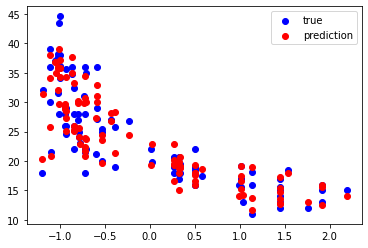

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_test[:, 0], y_test, c='b', label="true")
plt.scatter(X_test[:, 0], y_predict, c='r', label="prediction")
plt.legend()